# MACHINE LEARNING: SUPERVISED LEARNING
Dataset ***covtype*** from Kaggle.com

# 1. Import Libraries and Input Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#melihat semua row dan column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import standarscaller
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import libraries untuk classification project
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#libraries for evaluation classification project
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay,roc_auc_score,roc_curve
# Instead of importing plot_roc_curve from sklearn.metrics, import it from sklearn.metrics
from sklearn.metrics import RocCurveDisplay #For versions 1.2 and later

#For versions prior to 1.2:
#from sklearn.metrics import plot_roc_curve # Import plot_roc_curve separately

In [ ]:
df = pd.read_csv('covtype.csv') #input data

# 2. Basic EDA and Data Preprocessing

In [ ]:
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4     Soil_Type1  \
count     581012.000000     581012.000000     581012.000000  581012.000000   
mean           0.051434          0.436074          0.063627       0.005217   
std            0.220882          0.495897          0.244087       0.072039   
min            0.000000          0.000000          0.000000       0.000000   
25%            0.000000          0.000000          0.000000       0.000000   
50%            0.000000          0.000000          0.000000       0.000000   
75%            0.000000          1.000000          0.000000       0.000000   
max            1.000000          1.000000          1.000000       1.000000   

          Soil_Type2     Soil_Type3     Soil_Type4     Soil_Type5  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.012952       0.008301       0.021335       0.002749   
std         0.113066       0.090731       0.144499       0.052356   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type6     Soil_Type7     Soil_Type8     Soil_Type9  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.011316    

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Elevation =================


Elevation
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
2978    1656
2988    1619
2955    1590
2952    1577
2965    1571
2985    1567
2998    1557
2982    1554
2959    1551
3008    1517
2995    1509
3001    1502
2942    1475
3004    1469
2932    1455
2945    1453
2949    1446
2939    1440
3014    1434
3011    1433
3034    1411
3031    1385
3021    1364
3018    1363
3027    1363
3024    1359
3041    1338
2936    1334
2922    1326
2929    1325
3037    1322
3044    1253
2926    1250
2919    1249
2916    1237
3047    1232
3060    1190
3050    1153
2913    1143
3057    1138
3067    1132
3070    1118
3073    1116
2909    1113
3195    1109
3054    1105
3172    1104
3077    1100
3191    1090
3185    1088
3064    1087
3119    1087
3080    1083
3182    1078
3178    1074
3116    1068
3132    1066
3175    1065
3136    1064
3086    1063
3139    1062
3152    1060
3198    1056
3165    1048
3146    1046
3113    1044
3142    1042
3155    1041
3096    1041
3188    1038
3129    1036
3201    1034
3126    1031
3123    1026
3109    1018
3103    1017
3211    1013
3149    1013
2906    1012
3168    1009
3100    1008
3214    1002
3221    1001
3159     999
3162     998
3090     997
3093     996
3205     991
3083     984
3106     961
3208     955
3218     951
2903     944
3224     922
2900     920
3237     889
3223     877
3234     870
3204     867
3203     861
3244     856
2890     846
3194     845
3210     845
2896     844
3228     841
3207     837
2886     829
3231     827
3206     827
3036     825
3213     825
3190     824
2893     822
2954     821
3250     821
3187     820
2948     819
3240     816
3033     815
3095     812
3260     811
3200     810
2981     808
3216     805
3236     804
2984     803
3017     803
3128     802
2977     800
2974     799
2971     799
3183     797
3138     797
3226     797
3148     797
3219     796
3247     795
3130     794
3184     792
2958     792
3151     791
3257     788
3181     787
3026     786
3154     785
3156     784
3217     783
3134     782
2973     782
3220     781
3241     781
3233     780
2983     779
3197     778
2883     778
2956     776
3227     776
3029     775
3045     775
3133     775
3180     774
3040     773
3249     771
3118     770
2980     770
2873     770
3082     770
2951     770
3174     769
3141     769
3039     769
2969     767
3164     767
3105     767
3013     767
3161     766
3153     766
3078     765
3212     764
3025     764
2994     763
3253     762
2967     762
3199     761
2941     760
2997     760
3010     760
3023     759
2950     758
3135     758
3110     758
2960     758
3114     757
3015     757
3022     757
3081     755
3020     755
3005     755
3179     754
3158     754
2963     753
3030     753
3192     753
3143     752
2880     751
3009     751
2867     751
3032     750
3209     750
3215     750
3007     749
3042     748
3112     748
3043     748
2987     747
2961     746
3120     746
3038     745
3121     745
3229     744
3150     744
2966     744
3003     744
3124     743
2863     743
3076     743
3157     742
3230     741
3000     741
3115     740
3006     740
2979     740
2976     740
2970     740
3063     739
3049     739
2877     739
3242     739
3196     738
3171     738
3202     736
3144     736
2990     735
3255     735
3243     734
3193     733
2837     733
3176     733
2870     732
3074     732
3122     732
2854     731
3166     731
3137     730
3016     730
3186     729
3169     729
3254     729
3246     728
3099     728
2993     727
3019     726
3270     726
3028     725
3104     725
3085     725
3125     724
3256     724
3163     724
3059     723
3002     723
3102     723
3048     722
2860     722
2957     721
3087     721
2943     721
3189     721
3108     721
2992     720
3101     720
2986     720
3091     720
3235     719
3111     719
3239     718
3062     717
3098     716
3094     716
3225     716
3069     715
3084     715
3222     715
3167     715
3170     714
2935     713
3046     713
2850     713
3127     712
3177     712
3035     711


============= Aspect =================


Aspect
45     6308
0      4914
90     4677
135    3834
63     3680
315    3574
72     3407
18     3403
27     3392
34     2836
36     2826
32     2789
108    2783
54     2741
39     2711
58     2704
342    2676
56     2651
51     2633
67     2628
59     2621
53     2606
50     2604
22     2585
23     2584
333    2565
117    2563
68     2554
41     2554
52     2547
29     2542
62     2508
37     2498
38     2496
66     2495
13     2491
11     2481
49     2473
180    2467
28     2466
9      2460
79     2456
76     2456
61     2444
30     2439
81     2431
69     2430
24     2408
270    2408
40     2407
31     2404
47     2393
21     2379
17     2371
16     2352
43     2349
60     2336
14     2325
70     2307
15     2302
73     2298
74     2298
77     2281
25     2274
4      2267
20     2262
84     2261
42     2259
6      2242
82     2240
99     2240
8      2213
57     2202
86     2199
7      2194
65     2193
75     2185
351    2184
101    2184
48     2183
83     2174
94     2174
55     2166
35     2165
80     2153
103    2143
96     2141
10     2135
225    2104
349    2080
5      2063
33     2060
88     2050
85     2029
95     2025
356    2025
354    2025
338    2019
113    2018
347    1991
352    1985
87     1966
346    1957
104    1952
353    1946
3      1945
97     1943
355    1933
105    1920
111    1920
92     1919
98     1917
343    1917
100    1912
78     1912
106    1909
326    1907
26     1907
324    1904
2      1902
337    1899
93     1890
122    1887
328    1870
12     1867
126    1866
107    1864
357    1860
336    1849
331    1835
344    1830
112    1822
332    1815
321    1809
345    1791
339    1786
114    1786
330    1774
118    1762
335    1762
350    1761
121    1760
124    1760
64     1754
102    1749
358    1749
110    1739
119    1736
297    1724
322    1723
153    1721
323    1716
120    1710
162    1704
115    1697
329    1695
131    1689
340    1683
288    1675
1      1671
320    1644
129    1637
319    1637
348    1632
144    1612
128    1611
325    1607
130    1594
19     1593
127    1586
313    1568
317    1546
125    1534
318    1532
309    1528
146    1528
306    1527
327    1525
123    1523
311    1521
148    1489
310    1488
132    1486
141    1483
198    1476
133    1470
71     1470
139    1449
91     1444
143    1437
334    1434
302    1432
89     1432
308    1430
140    1416
359    1407
304    1406
341    1401
312    1380
137    1369
301    1366
307    1358
46     1355
149    1349
142    1343
207    1341
158    1331
152    1327
151    1321
44     1315
116    1313
157    1308
138    1287
252    1273
298    1273
150    1268
293    1267
243    1261
300    1254
156    1250
145    1232
299    1221
169    1219
292    1218
171    1209
109    1208
167    1196
174    1192
305    1186
147    1177
176    1175
155    1174
163    1173
294    1170
159    1170
166    1169
303    1145
172    1143
291    1139
165    1139
189    1134
184    1128
160    1127
279    1122
175    1108
216    1097
186    1097
285    1096
203    1086
164    1079
197    1075
284    1073
295    1073
170    1071
173    1070
281    1069
193    1064
276    1059
214    1059
283    1058
286    1057
202    1052
191    1047
287    1044
314    1042
188    1035
194    1031
274    1029
204    1019
201    1018
187    1009
316    1008
290    1002
177     997
277     994
168     993
259     992
266     990
278     989
208     985
196     984
211     983
183     980
185     979
210     973
261     971
280     968
195     968
212     963
178     956
190     954
192     952
209     949
247     941
296     938
182     937
200     936
275     934
282     929
234     926
264     922
205     920
154     916
256     904
236     899
249     898
219     893
257     886
263     885
239     881
238     880
232     874
233     864
253     863
265     861
230     855
217     852
254     852
255     850
272     843
221     843
161     838
268     834
134     832
179     832
248     825
220     823
241     820
262     819
231     818
273     817
260     816
240     8


============= Slope =================


Slope
11    33824
10    33812
12    33217
13    32419
9     32049
14    30282
8     30130
15    29127
16    26541
7     26395
6     24504
17    23255
18    21123
5     20810
19    19026
20    16650
4     16344
21    14401
22    13570
3     11620
23    11428
24    10360
25     8980
26     8090
2      7726
27     6768
28     5917
29     4982
30     4354
1      3680
31     3656
32     3198
33     2681
34     2190
35     1797
36     1376
37     1079
38      837
0       656
39      605
40      420
41      296
42      203
43      145
44      117
45       97
46       68
47       50
49       34
48       33
50       23
51       17
52        9
57        7
53        6
61        4
56        4
54        4
55        3
59        3
60        2
65        2
62        2
58        1
64        1
63        1
66        1
Name: count, dtype: int64


============= Horizontal_Distance_To_Hydrology =================


Horizontal_Distance_To_Hydrology
30      34139
0       24603
150     20785
60      19189
67      15223
42      14647
108     14358
85      13741
90      11140
120     10673
95       9216
124      8616
134      8506
212      8461
162      7709
242      7681
175      7646
277      7507
190      7020
180      6903
201      6892
210      6483
192      6439
300      6352
127      6289
228      6159
170      5799
234      5777
240      5713
268      5445
335      5104
216      5042
295      4835
390      4723
361      4698
256      4554
153      4407
270      4389
255      4137
182      4087
342      4066
319      3877
283      3854
218      3528
323      3489
330      3425
309      3376
247      3210
360      3036
446      3012
258      2978
408      2869
350      2825
450      2789
285      2750
430      2723
297      2709
391      2686
424      2549
313      2485
306      2448
376      2441
362      2362
510      2345
272      2294
484      2183
339      2168
324      2166
488      2152
404      2130
402      2107
351      2082
474      2063
417      1994
301      1968
420      1961
541      1895
379      1812
382      1807
371      1794
331      1778
524      1750
443      1724
366      1684
618      1673
384      1639
400      1585
418      1483
480      1461
457      1448
365      1444
511      1365
437      1296
573      1283
426      1278
552      1267
395      1264
607      1258
470      1203
433      1201
600      1161
467      1148
466      1129
577      1129
531      1118
553      1092
458      1077
497      1062
469      1053
540      1026
421      1013
636      1009
582       981
509       960
551       953
495       935
503       931
454       924
492       906
459       899
485       882
499       878
537       877
451       862
658       858
570       808
513       794
532       790
516       775
631       769
481       764
525       763
564       757
700       757
534       725
633       683
750       668
518       660
560       648
591       646
569       643
616       639
566       623
514       622
558       618
671       612
630       596
547       566
604       561
721       559
684       557
674       556
576       555
589       549
666       541
543       525
726       522
598       520
685       517
661       516
592       515
579       507
660       491
752       484
765       477
594       469
693       460
691       451
595       447
690       438
626       429
571       427
713       416
644       411
624       399
612       398
741       389
603       377
655       370
780       369
720       362
722       361
601       347
808       346
642       343
638       329
641       327
646       326
819       324
649       324
648       307
845       305
659       303
664       299
698       296
785       293
792       283
711       273
782       265
787       261
663       259
680       255
900       254
677       254
849       248
679       238
816       237
725       235
824       230
738       229
708       225
743       225
716       219
872       214
696       213
702       213
870       213
703       202
811       198
706       197
875       195
834       194
810       191
732       190
731       187
778       186
912       185
841       183
942       183
830       180
859       175
960       173
730       173
930       167
759       167
745       166
757       166
779       164
742       163
805       162
735       162
853       159
902       158
774       153
769       150
882       149
840       147
751       146
767       145
886       143
953       143
990       142
760       142
755       141
771       137
764       136
799       136
997       136
768       134
794       127
781       126
800       125
828       125
797       123
895       122
793       119
789       119
832       119
892       118
807       108
977       107
924       107
815       105
918       105
812       105
1020      104
806       102
914        96
1006       96
836        96
825        96
949        94
966        93
837  


============= Vertical_Distance_To_Hydrology =================


Vertical_Distance_To_Hydrology
 0      38665
 3       9298
 10      8863
 7       8741
 6       8590
 13      8474
 4       8397
 5       7614
 16      7429
 9       7331
 2       7202
 8       7192
 23      7183
 20      6981
 1       6938
 17      6624
 11      6594
 14      6506
 12      6451
 26      6426
 19      6188
 15      5922
 18      5578
 29      5570
 33      5524
 36      5522
 30      5491
 21      5454
 22      5336
-2       5179
 27      5106
 25      4986
 39      4917
 24      4875
-1       4858
 28      4672
 32      4662
 46      4605
 43      4393
 31      4392
 40      4337
 49      4300
 37      4263
 42      4231
 35      4231
 34      4220
-3       3994
 38      3970
 59      3709
 41      3699
 52      3691
 56      3651
 53      3588
 45      3566
 44      3479
 50      3459
 48      3404
 55      3300
 47      3267
 62      3231
-4       3157
 51      3123
-5       3086
 66      3076
 54      3007
 69      2984
 57      2887
 63      2877
 65      2839
-6       2835
 61      2816
 58      2811
 60      2776
 72      2689
 64      2489
 75      2473
 67      2450
 68      2434
 82      2399
 79      2334
 76      2329
 78      2311
 71      2311
 73      2280
 70      2209
 74      2120
 85      2115
-7       2058
-9       2046
 77      1999
 81      1949
 95      1949
 89      1935
 92      1919
 80      1896
-8       1884
 88      1869
 83      1863
 86      1812
 87      1758
 84      1747
 91      1688
 90      1601
 102     1571
 98      1565
 99      1555
 93      1537
 105     1523
-10      1512
 101     1457
-12      1457
 96      1442
 94      1442
 97      1427
 108     1421
 103     1312
-11      1310
 100     1307
 104     1256
 107     1237
 112     1233
 115     1232
 109     1207
 111     1185
 106     1161
 118     1138
 110     1117
-15      1112
 114     1100
-13      1057
 113     1040
 116     1024
 121     1014
 128     1013
 125     1010
 122      980
 119      962
 117      960
-14       953
-16       951
 120      933
 124      881
-19       873
 123      850
 134      847
 131      845
 127      830
 135      827
 126      788
 141      787
 129      766
-18       764
 130      746
-17       743
-22       740
 133      739
 138      716
 132      713
 137      688
 148      655
 151      648
 144      647
 139      636
 136      630
-20       628
-25       617
 145      615
 147      601
-21       601
 140      596
 157      587
 142      587
 149      570
-24       565
 143      560
 146      560
 164      545
 153      544
 154      543
 152      543
 158      539
 150      538
 161      535
 155      527
 156      517
 177      510
 167      510
 159      504
 171      502
-23       498
 160      497
 162      486
 174      481
 166      480
-28       479
 163      478
-29       472
 180      472
 170      465
-26       453
 165      448
 168      448
 173      443
-32       439
 169      435
 176      430
-27       425
 187      425
 172      418
 181      418
 184      410
 183      404
 178      403
 175      402
-31       402
 190      398
-35       387
 179      378
-30       375
 193      367
 185      355
 189      350
 186      346
 196      341
 182      341
 188      337
 194      320
 200      320
 198      318
 197      316
 191      315
 207      314
 202      314
 203      313
 192      309
 199      307
 195      304
-39       303
-38       300
 208      296
-36       291
-34       291
-33       277
 201      276
-42       273
 209      272
 214      268
 206      267
 212      263
 204      263
 213      255
 205      250
 211      243
 210      242
-41       238
-37       237
-48       225
-43       225
-40       220
-45       216
 220      215
 216      213
 217      212
 222      210
 215      210
 218      207
 225      192
-50       191
-44       188
 221      187
 219      183
 223      178
-55       176
 224      175
-47       174
 226      167
-51       167
 233      166
-46       164
 228      163
 230      160
 227      155
 231      155
 232   


============= Horizontal_Distance_To_Roadways =================


Horizontal_Distance_To_Roadways
150     1332
618     1065
900      918
390      914
1020     900
990      878
960      868
997      859
750      847
1140     840
1082     822
1110     815
1050     813
1530     801
510      794
277      789
700      776
541      775
1273     765
942      760
1087     755
607      753
300      753
912      748
1230     740
1410     737
930      732
446      731
1209     724
765      718
450      718
242      715
361      713
335      711
636      699
212      696
845      691
1290     687
752      686
1167     682
808      675
819      673
1142     668
721      661
430      660
953      660
108      660
1500     659
1224     653
524      650
872      649
726      648
658      646
484      642
870      639
488      639
1006     634
120      633
600      632
408      613
849      609
342      606
1471     605
474      603
902      594
573      594
977      592
1170     589
1266     589
1507     583
875      581
1302     578
1332     571
1358     568
1624     567
2040     561
577      558
210      557
1200     554
1061     553
780      551
1489     550
1008     548
391      545
240      545
180      545
1383     542
424      535
1423     534
295      533
1260     533
1092     529
1549     529
1710     528
671      527
2190     525
268      525
175      523
201      522
1650     522
684      521
1320     520
631      519
1950     517
1158     517
552      513
228      512
1084     511
685      509
1560     508
582      505
1146     503
190      503
162      502
1465     502
1590     501
785      501
1570     501
1448     498
1328     498
1116     496
134      495
234      494
553      492
1195     492
792      491
1315     491
1879     490
1800     490
1253     489
360      487
674      484
511      483
124      483
2160     480
1172     480
1233     479
713      477
859      476
741      475
1282     474
1350     474
192      473
1237     473
633      473
1040     472
1380     472
330      469
319      465
270      465
323      463
693      462
1080     462
666      461
1860     461
1231     458
1396     456
1276     454
886      454
1440     451
1812     450
2100     448
256      448
1348     445
816      443
1124     442
966      441
787      440
420      439
480      438
882      438
691      436
1595     432
824      432
1100     431
1718     431
2230     430
661      426
979      425
722      421
1463     421
924      421
830      418
1806     417
949      417
540      416
782      414
1740     413
1761     413
417      412
1194     412
1731     411
895      409
853      409
350      409
283      406
1842     406
216      406
892      406
402      405
1442     404
376      404
1154     402
1657     402
841      401
309      401
834      400
443      399
1015     399
1698     398
404      396
918      395
1784     395
1426     395
362      394
2012     394
1415     394
1406     394
457      392
1994     392
1114     391
2402     391
1019     391
983      387
1974     385
1048     385
811      385
1034     385
85       384
1248     384
1337     384
570      384
957      381
914      380
90       380
1443     379
1771     378
1207     376
1120     376
2821     376
1825     376
630      375
95       374
932      373
531      373
720      372
967      372
1477     371
1165     371
1956     369
1682     369
1101     369
1041     368
999      368
1756     368
551      368
170      367
1931     367
2496     367
994      366
2460     366
1106     366
934      366
1782     365
1482     365
1597     365
1148     364
1036     363
255      362
2250     362
1103     361
660      360
2340     360
1129     359
1064     359
690      359
1187     358
1637     358
616      357
1261     357
1159     356
1065     356
1075     355
1024     353
1544     353
1057     353
1421     348
2550     348
2971     347
418      347
1026     346
1556     346
1537     346
1677     346
379      346
1022     346
1150     346
1790     345
1566     345
1518     345
2089     345
127      344
1572     344
1892     343
497      343
166


============= Hillshade_9am =================


Hillshade_9am
226    11657
228    11374
230    11355
224    11210
223    10887
222    10809
233    10645
227    10513
225    10307
221    10264
231    10249
219    10152
218    10077
229     9959
220     9903
232     9847
216     9843
235     9664
234     9382
236     9026
215     8984
217     8916
238     8732
212     8685
237     8677
213     8635
214     8394
239     8142
211     8018
240     7728
208     7698
210     7669
207     7455
209     7262
241     7191
206     6912
204     6791
242     6780
205     6712
202     6694
243     6194
201     6130
203     6085
244     5941
199     5854
200     5653
195     5623
245     5530
198     5519
197     5274
196     5123
194     5092
246     5008
193     4743
192     4471
247     4443
191     4385
190     4296
189     4183
248     3955
187     3922
188     3840
249     3793
186     3639
185     3538
184     3514
250     3341
182     3238
183     3186
180     3048
251     2968
181     2936
179     2802
178     2751
252     2563
177     2562
176     2494
175     2493
174     2323
173     2282
253     2236
172     1965
254     1898
170     1892
171     1865
169     1753
167     1661
168     1646
166     1597
165     1503
164     1448
163     1414
162     1308
161     1243
158     1201
159     1197
160     1179
156     1072
157     1061
155     1038
152      984
151      926
154      918
153      908
150      896
149      837
147      810
148      764
145      732
146      713
143      653
144      625
142      624
141      577
137      568
139      558
140      540
138      533
134      479
136      465
135      429
132      425
133      422
131      419
130      373
129      357
125      347
127      337
128      317
126      311
124      266
123      257
122      251
121      243
120      242
118      224
117      208
119      202
115      182
116      178
114      168
113      150
112      138
110      134
108      128
109      125
106      121
107      114
111      111
104      103
105       98
103       89
102       86
101       72
99        70
100       68
93        62
97        61
96        58
98        58
94        58
88        52
95        48
90        47
91        44
89        36
79        34
86        33
92        33
87        32
83        30
85        30
81        26
82        22
76        20
75        19
80        18
84        17
71        15
77        15
73        14
72        14
0         13
70        12
66        11
74        10
78         9
69         8
64         7
65         7
68         6
60         6
56         6
67         6
59         5
63         4
54         4
58         3
62         2
57         2
52         2
46         2
61         2
55         1
36         1
53         1
50         1
Name: count, dtype: int64


============= Hillshade_Noon =================


Hillshade_Noon
228    13696
231    13666
233    13297
229    13271
230    13258
234    13047
227    13020
223    12989
226    12953
225    12928
232    12566
221    12192
224    12188
236    12138
222    11471
235    11377
218    11348
220    11250
237    10784
238    10638
239    10382
219    10204
217    10080
215     9817
216     9643
240     9582
241     9568
244     9261
214     9254
242     8926
247     8874
246     8665
243     8646
213     8615
245     8538
211     8399
248     8133
250     8028
212     7727
249     7714
210     7481
251     7471
252     7171
209     6684
207     6590
208     6461
253     6300
206     6010
254     5902
205     5533
204     5038
203     5012
202     4765
201     4359
200     3910
199     3756
198     3503
197     3501
196     3216
195     2930
194     2770
193     2490
191     2458
192     2407
190     2216
189     2124
188     1953
187     1808
186     1690
184     1656
185     1511
183     1468
182     1367
181     1300
180     1202
179     1120
178     1076
176     1049
177      998
175      928
174      820
173      794
172      773
171      708
169      690
170      675
168      613
167      543
166      524
165      473
163      469
164      428
161      410
162      403
159      339
160      337
158      329
157      285
155      279
156      269
154      240
153      239
152      237
151      233
149      201
150      186
148      169
144      142
147      142
146      132
145      130
141      100
143       98
142       94
140       91
139       77
135       73
138       71
136       69
130       55
134       54
137       52
133       48
131       47
129       40
132       39
128       38
126       34
124       29
125       28
127       26
120       22
121       19
122       18
114       17
123       16
113       16
119       14
110       14
112       13
99        13
107       11
116       11
118       10
111        8
104        8
115        8
103        7
98         7
117        7
109        5
105        5
108        5
100        5
0          5
101        5
85         4
96         4
95         4
102        3
97         3
106        3
87         2
93         2
92         2
53         2
82         2
90         2
80         2
30         1
76         1
74         1
91         1
81         1
63         1
75         1
40         1
89         1
45         1
78         1
42         1
71         1
88         1
68         1
64         1
Name: count, dtype: int64


============= Hillshade_3pm =================


Hillshade_3pm
143    7333
145    7217
138    7065
146    6915
142    6902
136    6871
139    6858
135    6781
149    6723
132    6673
150    6641
140    6601
129    6402
144    6341
137    6283
152    6270
141    6263
148    6218
128    6201
134    6187
156    6181
153    6112
147    6052
151    5987
131    5980
121    5959
133    5937
125    5925
124    5859
154    5834
127    5769
130    5745
155    5544
126    5496
166    5447
120    5438
159    5375
157    5203
160    5189
162    5042
158    5018
161    4984
118    4967
117    4963
119    4940
163    4909
122    4907
123    4902
110    4771
165    4761
169    4744
168    4631
164    4628
173    4535
116    4485
172    4455
113    4440
175    4411
176    4403
170    4346
114    4302
115    4265
179    4224
171    4139
167    4137
178    4054
182    3835
112    3735
109    3725
181    3719
107    3708
174    3694
111    3684
108    3676
187    3615
180    3604
183    3575
185    3554
184    3533
106    3505
177    3468
189    3276
99     3215
103    3192
104    3107
105    3098
102    3074
186    3052
191    2954
190    2930
188    2887
193    2860
192    2775
195    2718
101    2651
98     2622
100    2598
96     2561
194    2464
197    2397
97     2384
196    2343
95     2269
198    2153
199    2149
92     2127
91     2037
89     2023
200    2005
93     1942
94     1923
202    1886
201    1876
88     1841
203    1788
205    1776
90     1687
85     1660
204    1620
87     1609
206    1573
207    1554
80     1549
86     1533
84     1511
81     1460
208    1435
209    1422
210    1345
0      1338
83     1270
78     1267
82     1262
79     1260
77     1227
211    1201
74     1138
212    1096
214    1092
216    1082
213    1058
76     1049
73     1046
71     1030
75     1004
72      992
215     980
70      965
218     916
217     856
67      827
68      824
219     816
69      779
220     768
64      768
66      754
65      744
221     717
223     707
222     687
63      685
59      653
61      625
225     608
60      599
62      567
224     564
56      544
227     533
57      531
58      524
228     512
226     511
53      487
54      463
55      450
50      434
229     425
230     416
231     414
52      392
51      379
232     375
47      370
49      368
48      341
46      320
233     313
44      308
234     308
235     301
43      290
40      286
236     273
45      264
41      261
238     243
42      241
38      239
237     236
39      232
37      232
36      221
34      217
239     211
33      205
35      204
31      187
32      182
30      179
240     173
241     169
29      153
242     146
28      140
27      137
243     133
25      128
24      119
244     115
26      115
23      111
21      109
22      105
245      85
16       83
20       83
19       79
17       74
246      72
18       70
13       65
15       65
247      61
12       50
14       49
248      44
10       41
249      37
9        33
7        30
11       28
6        26
8        21
4        20
5        18
250      17
252      16
3        15
1        15
2        15
251      11
253       8
254       4
Name: count, dtype: int64


============= Horizontal_Distance_To_Fire_Points =================


Horizontal_Distance_To_Fire_Points
618     1412
541     1099
607     1054
942     1023
997     1004
700      958
900      937
726      923
752      910
960      908
765      898
1082     896
1087     884
1530     882
990      879
1142     872
1273     871
819      867
636      857
808      855
1471     854
845      847
1020     842
875      821
872      816
1507     814
902      812
1209     800
1224     798
912      797
1050     789
1410     788
1266     783
1110     774
242      771
1302     771
977      767
953      766
335      766
342      764
430      763
391      762
277      761
1332     758
721      758
361      756
408      754
1006     754
484      754
446      753
474      749
488      747
511      745
1140     744
1383     743
750      743
1500     741
524      729
1624     727
573      723
553      719
582      713
577      711
1290     708
849      700
633      694
1008     693
1448     692
1423     688
631      687
658      685
661      683
1084     681
1879     678
666      677
1465     677
674      672
684      670
930      668
671      666
685      665
1489     653
1358     651
1092     647
1172     646
691      644
1230     643
1116     639
693      637
713      630
2040     626
2230     618
1710     617
1549     613
741      609
722      609
1167     607
1158     606
1233     604
1812     602
1253     602
150      601
792      600
1595     597
1806     594
1950     592
1842     591
1237     589
1231     588
1195     588
212      586
782      584
787      583
1061     579
2190     576
1282     572
785      572
1328     571
390      570
424      569
824      569
816      568
834      565
300      565
830      561
811      560
450      559
510      557
841      555
1800     553
853      552
859      549
1170     549
1348     545
1276     543
1560     543
882      542
895      542
1406     539
1860     538
552      537
1682     535
892      534
924      533
1396     533
886      533
1443     532
1570     531
1415     530
1718     530
1657     530
1426     528
600      527
918      527
1956     526
2402     525
1200     525
2012     524
932      523
1731     523
914      521
934      521
1146     520
1974     520
1698     519
1590     516
949      514
1756     512
1260     512
1761     502
1320     501
967      501
1771     499
983      499
1784     497
1650     497
1463     496
994      496
957      494
1477     493
966      490
2089     489
1019     488
2496     487
979      486
1022     485
1790     485
1048     484
2160     483
1036     483
2081     479
2563     477
1024     477
1537     477
1544     477
1350     476
1041     475
1380     475
1026     474
1482     473
1825     472
2372     470
1015     469
1994     469
1518     468
1034     466
1565     466
1533     465
999      464
1065     462
1892     462
2389     461
1057     461
2431     460
2173     456
1572     452
1740     452
1150     452
1100     451
1040     450
1120     449
1889     448
1442     448
2148     445
1064     445
780      444
1201     444
1315     443
1597     443
1584     442
1114     442
1106     440
2197     440
1566     438
1556     437
1608     437
1124     436
1651     435
1101     435
1075     435
1154     434
1622     434
1613     433
1159     432
2442     429
1652     425
1187     424
1931     424
1440     424
1129     422
1165     422
1194     420
1717     420
1782     419
1959     419
1616     419
1173     418
67       416
2486     416
2268     415
1189     415
1637     415
1243     415
1681     414
2343     413
95       412
1660     412
870      412
108      412
1176     410
2460     409
1148     407
2100     406
2016     405
1248     404
134      404
1664     403
2255     403
1677     403
124      403
1689     402
2630     401
2014     400
1168     399
1261     399
190      398
1310     398
2067     397
1744     396
1218     396
153      396
182      395
162      395
1291     395
201      393
1318     391
228      391
175      391
1289     391
2072     391
1337     390
1742     390
218      390
1749     389
1182     389



============= Wilderness_Area1 =================


Wilderness_Area1
0    320216
1    260796
Name: count, dtype: int64


============= Wilderness_Area2 =================


Wilderness_Area2
0    551128
1     29884
Name: count, dtype: int64


============= Wilderness_Area3 =================


Wilderness_Area3
0    327648
1    253364
Name: count, dtype: int64


============= Wilderness_Area4 =================


Wilderness_Area4
0    544044
1     36968
Name: count, dtype: int64


============= Soil_Type1 =================


Soil_Type1
0    577981
1      3031
Name: count, dtype: int64


============= Soil_Type2 =================


Soil_Type2
0    573487
1      7525
Name: count, dtype: int64


============= Soil_Type3 =================


Soil_Type3
0    576189
1      4823
Name: count, dtype: int64


============= Soil_Type4 =================


Soil_Type4
0    568616
1     12396
Name: count, dtype: int64


============= Soil_Type5 =================


Soil_Type5
0    579415
1      1597
Name: count, dtype: int64


============= Soil_Type6 =================


Soil_Type6
0    574437
1      6575
Name: count, dtype: int64


============= Soil_Type7 =================


Soil_Type7
0    580907
1       105
Name: count, dtype: int64


============= Soil_Type8 =================


Soil_Type8
0    580833
1       179
Name: count, dtype: int64


============= Soil_Type9 =================


Soil_Type9
0    579865
1      1147
Name: count, dtype: int64


============= Soil_Type10 =================


Soil_Type10
0    548378
1     32634
Name: count, dtype: int64


============= Soil_Type11 =================


Soil_Type11
0    568602
1     12410
Name: count, dtype: int64


============= Soil_Type12 =================


Soil_Type12
0    551041
1     29971
Name: count, dtype: int64


============= Soil_Type13 =================


Soil_Type13
0    563581
1     17431
Name: count, dtype: int64


============= Soil_Type14 =================


Soil_Type14
0    580413
1       599
Name: count, dtype: int64


============= Soil_Type15 =================


Soil_Type15
0    581009
1         3
Name: count, dtype: int64


============= Soil_Type16 =================


Soil_Type16
0    578167
1      2845
Name: count, dtype: int64


============= Soil_Type17 =================


Soil_Type17
0    577590
1      3422
Name: count, dtype: int64


============= Soil_Type18 =================


Soil_Type18
0    579113
1      1899
Name: count, dtype: int64


============= Soil_Type19 =================


Soil_Type19
0    576991
1      4021
Name: count, dtype: int64


============= Soil_Type20 =================


Soil_Type20
0    571753
1      9259
Name: count, dtype: int64


============= Soil_Type21 =================


Soil_Type21
0    580174
1       838
Name: count, dtype: int64


============= Soil_Type22 =================


Soil_Type22
0    547639
1     33373
Name: count, dtype: int64


============= Soil_Type23 =================


Soil_Type23
0    523260
1     57752
Name: count, dtype: int64


============= Soil_Type24 =================


Soil_Type24
0    559734
1     21278
Name: count, dtype: int64


============= Soil_Type25 =================


Soil_Type25
0    580538
1       474
Name: count, dtype: int64


============= Soil_Type26 =================


Soil_Type26
0    578423
1      2589
Name: count, dtype: int64


============= Soil_Type27 =================


Soil_Type27
0    579926
1      1086
Name: count, dtype: int64


============= Soil_Type28 =================


Soil_Type28
0    580066
1       946
Name: count, dtype: int64


============= Soil_Type29 =================


Soil_Type29
0    465765
1    115247
Name: count, dtype: int64


============= Soil_Type30 =================


Soil_Type30
0    550842
1     30170
Name: count, dtype: int64


============= Soil_Type31 =================


Soil_Type31
0    555346
1     25666
Name: count, dtype: int64


============= Soil_Type32 =================


Soil_Type32
0    528493
1     52519
Name: count, dtype: int64


============= Soil_Type33 =================


Soil_Type33
0    535858
1     45154
Name: count, dtype: int64


============= Soil_Type34 =================


Soil_Type34
0    579401
1      1611
Name: count, dtype: int64


============= Soil_Type35 =================


Soil_Type35
0    579121
1      1891
Name: count, dtype: int64


============= Soil_Type36 =================


Soil_Type36
0    580893
1       119
Name: count, dtype: int64


============= Soil_Type37 =================


Soil_Type37
0    580714
1       298
Name: count, dtype: int64


============= Soil_Type38 =================


Soil_Type38
0    565439
1     15573
Name: count, dtype: int64


============= Soil_Type39 =================


Soil_Type39
0    567206
1     13806
Name: count, dtype: int64


============= Soil_Type40 =================


Soil_Type40
0    572262
1      8750
Name: count, dtype: int64


============= Cover_Type =================


Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0
Soil_Type15                           0
Soil_Type16                           0
Soil_Type17                           0
Soil_Type18                           0
Soil_Type19                           0
Soil_Type20                           0
Soil_Type21                           0
Soil_Type22                           0
Soil_Type23                           0
Soil_Type24                           0
Soil_Type25                           0
Soil_Type26                           0
Soil_Type27                           0
Soil_Type28                           0
Soil_Type29                           0
Soil_Type30                           0
Soil_Type31                           0
Soil_Type32                           0
Soil_Type33                           0
Soil_Type34                           0
Soil_Type35                           0
Soil_Type36                           0
Soil_Type37                           0
Soil_Type38                           0
Soil_Type39                           0
Soil_Type40                           0
Cover_Type                            0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

From the results, it was found that the data:
- Contains no missing values
- Contains no duplicates
- Has a total of 581,012 entries
- Consists of 54 columns

# 3. Feature Engineering

Since there is a large amount of data, which can slow down the execution process, I have selected a sample of 5,000 entries for this process.

In [ ]:
df_sample = df.head(5000).copy()

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           5000 non-null   int64
 1   Aspect                              5000 non-null   int64
 2   Slope                               5000 non-null   int64
 3   Horizontal_Distance_To_Hydrology    5000 non-null   int64
 4   Vertical_Distance_To_Hydrology      5000 non-null   int64
 5   Horizontal_Distance_To_Roadways     5000 non-null   int64
 6   Hillshade_9am                       5000 non-null   int64
 7   Hillshade_Noon                      5000 non-null   int64
 8   Hillshade_3pm                       5000 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  5000 non-null   int64
 10  Wilderness_Area1                    5000 non-null   int64
 11  Wilderness_Area2                    5000 non-null   int64
 12  Wilder

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df_sample[column].value_counts())
    print()

============= Elevation =================


Elevation
2290    16
2955    16
2289    15
2952    14
2753    13
2809    13
2304    12
2140    12
2785    12
2128    12
2978    11
2962    11
2739    11
2995    11
2126    11
2942    11
2929    11
2137    11
2225    11
2212    11
2932    11
2094    11
2073    11
2298    11
2751    11
2328    11
2130    10
2327    10
2317    10
2199    10
2151    10
2175    10
2132    10
2055    10
2780    10
2888    10
2188    10
2919    10
2224    10
2808    10
2795    10
2216    10
2141    10
2180    10
2346    10
2786    10
2740    10
2118    10
2315    10
2792    10
2763    10
2742     9
2214     9
2311     9
2784     9
2714     9
2895     9
2719     9
2297     9
2331     9
2747     9
2320     9
2238     9
2164     9
2111     9
2192     9
2295     9
2893     9
2233     9
3008     9
2341     9
2291     9
2256     9
2149     9
2340     9
2336     9
2325     9
2206     9
2898     9
2896     9
2729     9
2782     9
2764     9
2769     9
3047     9
2976     9
2208     9
2116     9
2078     9
2129     9
2799     9
2161     9
2110     9
2294     8
2177     8
2703     8
2326     8
2268     8
2280     8
2699     8
2153     8
2274     8
2801     8
2248     8
2285     8
2310     8
2314     8
2246     8
2241     8
2139     8
2183     8
2184     8
2215     8
2847     8
2827     8
2270     8
2200     8
2190     8
2062     8
2162     8
2939     8
2121     8
2916     8
2728     8
2890     8
2707     8
2931     8
2856     8
2741     8
2733     8
2917     8
2807     8
2802     8
2922     8
2724     8
2743     8
2861     8
2903     8
2975     8
2945     8
3001     8
2811     7
2257     7
2138     7
2205     7
2168     7
2147     7
2157     7
2261     7
2276     7
2219     7
2796     7
2959     7
3004     7
3241     7
3146     7
3011     7
2172     7
2203     7
2702     7
2170     7
2264     7
2165     7
2247     7
2914     7
2284     7
3024     7
2104     7
2075     7
2913     7
2813     7
2263     7
2166     7
2258     7
2210     7
2800     7
2851     7
2889     7
2828     7
2716     7
2076     7
2803     7
2926     7
2117     7
2122     7
2736     7
2850     7
2900     7
2255     7
2362     7
2063     7
2859     7
2821     7
2231     7
2068     7
2982     7
2358     7
3221     7
2237     7
2271     7
2826     7
2211     7
2186     7
2902     7
2750     7
2770     7
2353     7
2812     7
2830     7
2686     7
2953     7
2746     7
2234     7
2278     7
2218     7
2220     7
2194     7
2143     7
2106     7
2695     7
2706     7
2725     7
2338     7
2744     7
2756     7
2878     7
2848     7
2718     7
2187     7
2090     7
2092     7
3018     7
2113     6
2717     6
2773     6
2685     6
2337     6
2977     6
2253     6
2781     6
2324     6
2306     6
2794     6
2120     6
2998     6
2676     6
3121     6
2103     6
2095     6
2096     6
2985     6
2779     6
2114     6
2768     6
3201     6
2972     6
2148     6
2054     6
3182     6
2788     6
2791     6
2027     6
2084     6
2171     6
2191     6
2201     6
2108     6
2286     6
2938     6
2275     6
2731     6
2829     6
2771     6
2059     6
2189     6
2838     6
2891     6
2690     6
2036     6
2032     6
2915     6
2368     6
2083     6
2195     6
2354     6
2723     6
2081     6
2868     6
2762     6
2760     6
3057     6
2651     6
2124     6
2045     6
2293     6
2342     6
2193     6
2240     6
2793     6
2260     6
2163     6
2894     6
2107     6
2006     6
2223     6
3021     6
3175     6
2281     6
2239     6
2333     6
2360     6
2292     6
2252     6
3034     6
2755     6
2720     6
2198     6
2127     6
2145     6
2309     6
2806     6
2072     6
2775     6
2357     6
3064     6
3050     6
2787     6
2871     6
2954     6
2958     6
2822     6
2102     6
2877     6
3168     6
3109     6
2722     6
2662     6
2312     6
2156     6
2022     6
2897     6
2820     6
3276     6
2119     6
2160     6
2047     6
2044     6
2025     5
2167     5
2125     5
3213     5
3260     5
3178     5
2302     5
3251     5
2836     5
2074     5
2862     5
2816     5
2883     5
2133     5
2142     5
3095    


============= Aspect =================


Aspect
45     46
135    36
90     34
0      33
62     32
87     31
102    31
128    30
122    30
53     30
76     30
63     30
72     29
117    29
108    29
106    28
27     28
75     28
68     28
80     27
61     27
66     26
59     26
100    26
323    26
129    26
49     26
95     25
58     25
83     25
71     25
352    25
127    25
81     25
114    25
101    25
54     25
105    25
98     25
41     24
121    24
125    24
332    24
57     24
126    24
52     24
60     24
326    24
107    24
55     23
82     23
120    23
109    23
73     23
86     23
130    23
111    23
51     23
84     22
96     22
93     22
141    22
9      22
15     22
124    22
315    21
77     21
34     21
18     21
113    21
331    21
92     21
48     21
311    21
343    20
8      20
116    20
320    20
99     20
118    20
351    20
356    19
88     19
330    19
36     19
85     19
56     19
310    19
13     19
69     19
50     19
312    19
337    19
131    19
89     18
33     18
78     18
136    18
288    18
64     18
341    18
94     18
347    18
67     18
119    18
31     18
103    18
133    18
123    18
104    18
112    18
322    18
23     18
97     18
354    17
39     17
79     17
138    17
30     17
42     17
28     17
333    17
338    17
110    17
134    17
325    17
11     17
339    16
25     16
115    16
324    16
21     16
3      16
329    16
349    16
40     16
74     16
307    16
334    16
313    16
139    15
300    15
274    15
47     15
5      15
346    15
261    15
24     15
70     15
29     15
6      15
14     15
321    15
37     15
38     15
2      15
35     15
7      15
32     15
308    15
285    14
65     14
340    14
317    14
328    14
358    14
335    14
26     14
132    13
270    13
353    13
318    13
167    13
144    13
180    13
327    13
91     13
297    13
148    13
143    13
163    13
348    13
22     13
357    13
273    13
345    12
16     12
359    12
137    12
4      12
10     12
280    12
153    12
46     12
146    12
344    12
1      12
350    12
43     12
293    12
234    12
294    11
302    11
309    11
301    11
303    11
155    11
170    11
316    11
319    11
342    11
149    11
162    11
198    11
253    11
158    11
151    11
291    10
19     10
299    10
276    10
17     10
275    10
283    10
12     10
169    10
44     10
159    10
183    10
160    10
336    10
142    10
281     9
166     9
286     9
164     9
306     9
145     9
20      9
304     9
289     9
292     9
251     9
150     9
207     9
252     9
238     9
282     9
172     9
179     9
355     9
230     9
255     9
243     9
140     8
190     8
203     8
266     8
305     8
228     8
189     8
257     8
284     8
229     8
298     8
176     8
268     8
173     8
191     7
181     7
314     7
152     7
239     7
175     7
260     7
272     7
271     7
259     7
157     7
209     7
188     7
223     7
147     7
290     7
233     7
254     7
240     7
219     6
269     6
247     6
177     6
296     6
287     6
256     6
231     6
200     6
211     6
156     6
194     6
204     6
174     6
185     6
278     6
279     6
216     6
267     6
277     6
214     5
171     5
168     5
242     5
197     5
199     5
295     5
262     5
224     5
244     5
193     5
208     5
258     5
235     5
202     5
205     5
210     5
217     5
263     5
264     5
232     5
236     5
265     5
196     5
225     4
184     4
227     4
241     4
154     4
248     4
237     4
182     4
213     4
250     4
165     4
245     4
215     4
246     4
192     3
178     3
212     3
222     3
161     3
187     3
221     3
220     3
226     3
218     3
249     3
201     2
206     2
195     2
186     2
360     1
Name: count, dtype: int64


============= Slope =================


Slope
9     222
13    212
11    208
10    199
12    198
8     187
14    182
7     181
17    172
16    166
20    161
15    160
18    158
5     157
23    154
6     154
21    153
19    149
24    146
22    145
28    139
25    133
26    131
27    128
4     104
30    104
31    101
29     98
32     91
3      86
33     82
2      53
34     52
35     44
37     38
36     33
1      26
38     23
39     16
40     13
41     13
46     10
44      4
49      3
0       2
47      2
45      2
42      2
48      1
52      1
43      1
Name: count, dtype: int64


============= Horizontal_Distance_To_Hydrology =================


Horizontal_Distance_To_Hydrology
0      642
30     485
150    182
60     181
42     156
67     147
108    130
85     126
134    100
120     97
95      94
90      91
124     89
212     83
277     74
175     67
190     65
127     65
242     64
228     61
210     57
180     57
162     55
201     50
300     49
240     49
319     49
192     47
361     47
170     45
268     45
234     43
153     39
247     39
255     37
218     36
342     35
335     35
216     34
270     34
182     34
295     33
283     29
323     28
258     26
285     24
256     24
350     24
330     23
390     23
360     22
309     22
339     21
306     21
297     20
313     19
362     19
446     19
408     18
424     18
430     18
391     18
324     17
379     17
301     17
404     16
272     16
382     15
366     14
376     14
450     13
400     13
384     12
371     12
402     12
365     12
458     11
484     11
417     11
457     10
331     10
420     10
418     10
395      9
488      9
437      9
351      9
426      8
443      8
618      8
524      8
433      7
497      7
421      7
485      7
499      7
454      6
564      6
531      6
510      6
474      6
480      6
466      5
553      5
570      5
600      5
573      5
495      5
532      5
631      4
658      4
516      4
541      4
537      4
525      4
459      4
518      4
451      4
592      3
582      3
543      3
551      3
700      3
513      3
659      3
612      3
470      3
591      3
547      3
492      3
469      2
560      2
579      2
680      2
641      2
842      2
604      2
648      2
636      2
721      2
607      2
655      2
743      2
503      2
674      2
558      2
849      2
630      2
481      2
511      2
616      2
741      2
467      2
514      2
815      2
984      1
750      1
759      1
693      1
752      1
603      1
720      1
997      1
811      1
870      1
792      1
690      1
931      1
626      1
789      1
696      1
764      1
780      1
730      1
633      1
509      1
932      1
638      1
649      1
642      1
722      1
540      1
691      1
812      1
771      1
830      1
778      1
589      1
577      1
566      1
702      1
711      1
799      1
571      1
576      1
534      1
787      1
726      1
685      1
841      1
706      1
703      1
Name: count, dtype: int64


============= Vertical_Distance_To_Hydrology =================


Vertical_Distance_To_Hydrology
 0      743
 4       84
 3       75
 7       72
 10      69
 5       67
 13      66
 8       66
 11      64
 2       62
 6       62
 9       59
 16      54
 12      52
 23      51
 15      47
 37      47
 14      46
 20      46
 17      45
 25      43
 35      42
-1       41
 19      41
 32      41
 22      41
 18      40
 26      39
 1       39
 21      36
 29      36
 49      36
 24      35
-2       35
 43      35
 33      34
 42      34
 60      33
 36      33
 41      33
 52      32
 39      31
-3       31
 31      31
 55      31
 30      31
 28      29
 27      28
 51      28
 66      28
 45      28
 47      26
 59      26
-6       26
 74      25
 46      25
 58      24
 54      24
 53      24
 40      24
 65      23
 50      23
 88      22
 69      22
 70      22
 34      22
 61      21
 75      21
 91      21
 62      21
 73      20
 48      20
 44      20
 56      20
 76      20
 72      20
 83      19
-5       19
 89      19
 98      18
 105     18
 95      18
 80      18
 78      17
-7       17
 71      17
 87      17
 102     17
 85      17
 63      17
 86      16
 81      16
-4       16
 68      16
 92      16
 132     15
 112     15
 82      15
 79      15
 121     15
 67      15
 128     15
 129     15
 64      15
 57      15
 93      15
 94      14
 106     14
 101     14
 109     14
 77      14
 38      14
 110     14
-8       13
 134     13
 108     13
 115     13
 104     12
 99      12
 127     12
 147     12
 114     12
 119     12
 142     12
 151     12
 100     12
 84      12
 165     11
 111     11
 96      11
 141     11
 90      10
 97      10
 107     10
 137     10
 143     10
 160     10
 145     10
 159     10
-15      10
-13      10
 103     10
 135     10
 144     10
 155     10
-9       10
 117      9
-19       9
 124      9
 149      9
 122      9
 118      9
 152      9
 130      8
 113      8
 162      8
 161      8
 125      7
 176      7
 163      7
 139      7
 180      7
 153      6
-10       6
 154      6
 123      6
-18       6
-12       6
-35       6
 120      6
 136      6
 199      6
 150      6
-11       6
 174      5
 175      5
 133      5
 116      5
 168      5
 177      5
 158      5
 167      5
 164      5
-20       5
 245      5
-17       5
 241      5
 140      5
 146      5
 185      4
 195      4
-14       4
 214      4
 131      4
-16       4
 181      4
 171      4
 193      4
 169      4
-26       4
-30       4
 148      4
 204      4
 138      4
 230      3
 166      3
-33       3
 216      3
 187      3
 182      3
-24       3
 197      3
 184      3
 192      3
 209      3
 213      3
 206      3
 189      3
-32       3
 172      3
 157      3
 170      3
 126      3
 198      3
 233      2
 173      2
 210      2
 178      2
-50       2
-100      2
-29       2
 196      2
 229      2
 226      2
 191      2
 207      2
 222      2
 211      2
 228      2
 219      2
-21       2
-25       2
 179      2
 217      2
 186      2
 225      2
 202      2
-51       2
 212      2
 183      2
 238      2
-37       2
 156      2
 262      2
 231      2
-39       2
 188      2
-23       2
-28       2
 270      1
 253      1
 224      1
 264      1
-41       1
-72       1
-134      1
-45       1
-76       1
-64       1
-47       1
 215      1
-62       1
-65       1
 248      1
-53       1
 235      1
 232      1
-36       1
-49       1
 208      1
 200      1
 237      1
 240      1
-60       1
-85       1
-71       1
-110      1
-95       1
-108      1
-63       1
-82       1
-83       1
 239      1
 247      1
 249      1
-40       1
 354      1
 554      1
 244      1
 547      1
 251      1
 271      1
 220      1
 254      1
 242      1
-38       1
-104      1
-22       1
-42       1
-43       1
 284      1
-69       1
-78       1
 218      1
 203      1
-87       1
-34       1
 256      1
 243      1
 261      1
 257      1
Name: count, dtype: int64


============= Horizontal_Distance_To_Roadways =================


Horizontal_Distance_To_Roadways
150     48
120     33
108     27
212     21
1110    21
335     20
228     19
1140    18
390     18
162     17
175     17
240     17
1082    17
180     16
849     16
450     16
210     16
124     15
295     15
323     15
270     15
1167    15
242     15
277     15
330     14
1050    14
1008    14
618     14
1273    14
360     13
391     13
658     13
268     13
190     13
90      13
1116    13
201     13
134     12
997     12
1230    12
541     12
636     12
256     12
127     12
300     12
1358    12
350     12
607     11
990     11
1231    11
1040    11
741     11
524     11
1200    11
700     11
819     11
95      11
564     11
828     11
1224    11
420     11
912     10
1092    10
510     10
218     10
930     10
1087    10
430     10
979     10
900     10
942     10
1124    10
1260    10
408     10
1423    10
870     10
1158    10
1302    10
1290    10
424     10
726     10
750     10
960      9
895      9
1350     9
518      9
319      9
876      9
792      9
1176     9
362      9
785      9
616      9
808      9
914      9
787      9
234      9
480      9
1266     9
1020     9
255      9
582      9
170      9
474      9
192      9
955      9
361      9
633      8
553      8
1410     8
932      8
1061     8
957      8
1209     8
511      8
306      8
313      8
153      8
182      8
342      8
660      8
488      8
1323     8
816      8
446      8
540      8
309      8
283      8
1332     8
570      8
721      8
984      8
1307     8
1207     8
247      8
1383     8
481      8
1406     8
1146     8
1282     8
365      7
417      7
891      7
872      7
484      7
331      7
752      7
631      7
845      7
443      7
566      7
780      7
404      7
384      7
1172     7
834      7
467      7
1298     7
953      7
720      7
1434     7
1195     7
824      7
1068     7
1401     7
1500     7
1276     7
1026     7
882      7
600      7
830      7
850      7
976      6
592      6
1425     6
1242     6
1385     6
841      6
966      6
977      6
285      6
457      6
1262     6
324      6
258      6
297      6
840      6
85       6
272      6
1129     6
1415     6
339      6
918      6
1189     6
875      6
451      6
1392     6
782      6
1003     6
626      6
433      6
1338     6
1149     6
514      6
1103     6
1364     6
934      6
1120     6
765      6
638      6
573      6
810      6
531      6
1380     6
552      6
937      6
497      6
1326     6
591      6
764      6
1317     5
1590     5
1194     5
1022     5
543      5
1142     5
1437     5
537      5
800      5
1214     5
1374     5
495      5
1148     5
812      5
1134     5
684      5
671      5
1154     5
853      5
558      5
402      5
547      5
1127     5
858      5
426      5
1182     5
1138     5
890      5
1240     5
1033     5
595      5
630      5
1233     5
722      5
1448     5
907      5
1384     5
509      5
902      5
1019     5
811      5
1235     5
1442     5
1237     5
1473     5
1321     5
1107     5
1530     5
691      5
1256     5
421      5
666      5
1440     5
1463     5
916      5
1188     5
560      4
1057     4
532      4
768      4
865      4
774      4
1337     4
1248     4
1357     4
400      4
1279     4
892      4
661      4
1064     4
1100     4
646      4
30       4
516      4
351      4
703      4
454      4
1451     4
680      4
577      4
1418     4
589      4
674      4
735      4
1074     4
3599     4
458      4
1597     4
1936     4
603      4
711      4
1465     4
1165     4
806      4
1218     4
1126     4
1168     4
911      4
1441     4
642      4
973      4
854      4
1398     4
1084     4
1153     4
799      4
1445     4
1413     4
1263     4
1650     4
1333     4
1379     4
1080     4
1291     4
1691     4
994      4
2758     4
1340     4
1150     4
1318     4
1489     4
1024     4
1476     4
1320     4
1443     4
1634     4
1277     4
1243     4
1342     4
1897     4
716      4
664      4
569      4
1329     4
1015     4
5167     4
1355     4
1959     4
738      4
1528     4
379     


============= Hillshade_9am =================


Hillshade_9am
252    92
232    90
228    88
230    87
224    85
253    85
223    85
251    85
254    83
229    81
233    80
231    80
249    79
246    79
225    79
234    78
247    78
226    78
250    77
227    75
222    74
220    73
238    72
221    71
236    69
239    66
235    66
248    65
240    64
242    64
209    63
215    63
245    61
213    60
237    59
243    59
241    57
217    57
244    57
218    53
219    53
216    51
196    51
211    49
208    49
202    47
194    46
205    45
212    45
210    44
201    42
204    42
197    42
203    41
214    41
207    38
198    38
206    36
195    36
193    35
178    35
192    32
190    32
187    32
186    32
199    32
188    31
189    31
200    31
183    29
191    29
184    28
185    28
181    26
174    22
168    20
172    20
175    19
163    19
176    18
167    18
164    18
155    17
173    17
170    16
162    16
179    16
177    16
180    16
171    15
145    15
149    15
182    15
161    14
159    14
150    14
151    13
165    13
146    13
154    13
169    12
153    12
133    12
136    11
157    11
131    10
123    10
147    10
142    10
152    10
127     9
166     9
141     9
156     9
158     9
160     9
144     9
148     8
140     8
124     8
114     8
130     8
125     8
134     8
139     7
143     7
138     7
126     7
137     7
115     6
116     6
120     5
119     5
132     5
110     5
128     4
135     4
122     4
107     4
129     4
111     4
99      3
101     3
118     3
117     3
88      3
85      2
59      2
96      2
83      2
105     2
102     2
113     2
100     1
0       1
108     1
89      1
121     1
103     1
65      1
92      1
109     1
95      1
93      1
80      1
98      1
81      1
97      1
Name: count, dtype: int64


============= Hillshade_Noon =================


Hillshade_Noon
225    125
229    109
231    108
230    108
234    102
223    102
224     98
219     97
222     96
227     94
214     90
218     90
233     89
217     89
221     88
226     86
211     82
228     82
220     81
216     80
232     79
244     77
236     75
242     74
215     72
241     67
239     67
238     66
237     65
247     64
213     64
240     63
209     63
235     60
207     60
243     59
210     59
208     59
212     58
245     54
205     52
200     50
251     50
204     50
203     49
246     49
206     49
249     48
253     46
248     46
202     43
199     42
252     39
197     39
198     38
194     38
195     37
196     36
250     36
188     35
187     35
192     34
186     34
201     33
184     32
190     32
254     32
183     29
193     29
189     29
180     28
168     27
173     27
177     21
170     20
169     20
191     20
179     20
178     20
185     20
181     19
172     19
167     18
182     18
176     18
174     16
163     15
157     15
166     14
171     14
161     14
175     13
162     12
164     12
155     12
154     11
158     10
160      9
156      8
165      8
152      7
151      7
149      7
159      7
153      6
141      6
133      5
138      5
147      5
150      5
140      4
143      4
130      3
137      3
146      3
142      3
135      3
126      2
111      2
148      2
113      2
99       2
136      2
107      1
103      1
125      1
119      1
124      1
118      1
116      1
121      1
120      1
127      1
144      1
145      1
134      1
128      1
139      1
Name: count, dtype: int64


============= Hillshade_3pm =================


Hillshade_3pm
0      54
137    53
143    51
149    50
146    50
138    50
150    49
135    49
154    49
144    48
129    48
130    45
152    44
115    43
165    43
124    43
153    42
133    42
114    40
182    40
125    40
157    39
161    39
136    38
163    38
112    38
132    37
151    37
148    37
141    37
158    36
121    36
173    36
156    36
179    36
127    35
140    35
134    35
109    35
97     35
131    35
128    34
118    34
107    34
106    34
123    34
126    33
183    33
177    33
119    33
175    33
195    33
122    32
142    32
145    32
168    32
172    32
147    31
166    31
160    31
187    31
171    31
96     30
139    30
162    30
110    30
108    30
99     30
169    29
82     29
113    29
159    29
80     28
164    28
104    27
176    27
180    27
95     27
98     27
184    27
100    27
155    27
116    26
103    26
186    26
181    26
196    26
189    26
91     26
66     25
87     25
120    25
92     25
192    25
75     25
117    24
111    24
70     24
178    24
58     24
59     23
170    23
191    23
105    23
199    22
102    22
185    22
84     22
89     22
174    21
73     21
81     21
167    21
90     21
61     21
63     20
60     20
101    20
194    20
88     20
78     20
210    20
85     19
93     19
69     19
83     19
79     19
193    19
188    18
197    18
71     18
206    18
86     18
51     17
190    17
76     17
67     17
77     17
72     17
94     16
204    16
215    16
217    16
64     16
213    16
50     15
198    15
48     14
65     14
203    14
32     14
57     14
31     14
74     14
209    13
49     13
208    13
37     13
216    13
55     13
62     13
52     12
36     12
39     12
221    12
205    12
218    12
44     12
42     12
54     12
211    12
207    12
202    10
56     10
201    10
200    10
46     10
214    10
225     9
33      9
228     9
41      9
38      9
224     9
230     9
45      8
222     8
227     8
40      8
24      8
43      8
219     8
53      8
212     7
12      7
29      7
68      7
25      7
223     6
47      6
35      6
23      6
22      6
232     6
236     6
34      5
220     5
30      5
18      5
28      5
240     4
234     4
229     4
233     4
238     4
20      4
15      4
27      4
231     4
237     3
19      3
16      3
14      3
226     3
243     3
13      2
26      2
21      2
17      2
246     2
242     2
241     2
235     2
244     2
239     2
9       2
3       2
245     1
247     1
1       1
248     1
11      1
6       1
Name: count, dtype: int64


============= Horizontal_Distance_To_Fire_Points =================


Horizontal_Distance_To_Fire_Points
277     25
607     23
342     23
361     18
408     18
618     17
212     17
541     17
808     17
335     17
242     17
752     16
390     16
300     15
234     15
150     15
228     15
162     14
661     14
726     14
577     14
636     14
942     14
573     14
474     14
960     13
424     13
631     13
201     13
553     13
350     13
190     13
684     13
721     13
488     13
175     13
108     13
331     12
997     12
700     12
67      12
510     12
430     12
351     12
872     12
484     12
391     12
459     11
765     11
134     11
95      11
811     11
524     11
1383    11
153     11
301     11
495     11
446     11
691     11
819     11
845     11
722     11
633     11
547     11
218     11
674     10
379     10
402     10
601     10
644     10
664     10
256     10
417     10
511     10
902     10
285     10
859     10
514     10
309     10
365     10
671     10
816     10
306     10
612      9
454      9
780      9
503      9
1006     9
324      9
466      9
750      9
582      9
1302     9
1020     9
182      9
1448     9
571      9
663      9
216      9
932      9
421      9
384      9
371      9
1396     9
824      9
295      9
592      9
313      9
882      9
552      8
1410     8
792      8
1140     8
967      8
376      8
1273     8
569      8
892      8
900      8
785      8
418      8
470      8
741      8
437      8
543      8
1513     8
787      8
400      8
731      8
912      8
1318     8
658      8
560      8
1266     8
732      8
589      8
875      8
789      8
1050     8
1465     8
870      8
853      8
458      8
983      8
779      8
258      8
518      8
918      8
492      8
1507     8
1879     7
1482     7
624      7
450      7
323      7
849      7
366      7
711      7
768      7
1530     7
120      7
268      7
532      7
531      7
192      7
404      7
924      7
1237     7
886      7
1290     7
1337     7
457      7
641      7
778      7
685      7
1142     7
1116     7
426      7
481      7
1110     7
1082     7
395      7
499      7
247      7
834      7
1276     7
977      7
1471     7
1262     6
1189     6
1406     6
812      6
1556     6
1323     6
953      6
480      6
330      6
1710     6
2012     6
1159     6
730      6
1860     6
837      6
1533     6
210      6
1812     6
558      6
680      6
283      6
815      6
649      6
1350     6
1315     6
1167     6
485      6
1379     6
2190     6
2252     6
1195     6
1423     6
2704     6
319      6
85       6
1008     6
469      6
272      6
1537     6
1087     6
642      6
297      6
603      6
1544     6
990      6
566      6
966      6
979      5
1230     5
598      5
591      5
124      5
708      5
1019     5
626      5
1718     5
908      5
939      5
2282     5
1291     5
604      5
497      5
2148     5
1477     5
1092     5
2147     5
1168     5
876      5
666      5
1048     5
1451     5
841      5
1398     5
420      5
999      5
883      5
914      5
895      5
1332     5
600      5
1691     5
1443     5
525      5
745      5
595      5
904      5
433      5
769      5
564      5
1492     5
1172     5
2136     5
1233     5
949      5
42       5
830      5
616      5
1321     5
1456     5
2347     5
677      5
828      5
576      5
1015     5
934      5
1401     5
1231     5
443      5
655      5
850      5
1338     5
1473     5
1600     4
1565     4
1617     4
1560     4
962      4
1146     4
1150     4
1852     4
1657     4
1421     4
1218     4
451      4
30       4
540      4
1894     4
2726     4
90       4
467      4
1907     4
1425     4
1012     4
339      4
805      4
1634     4
537      4
1104     4
60       4
1510     4
1848     4
782      4
1719     4
2285     4
2352     4
874      4
1381     4
1651     4
360      4
1206     4
1320     4
2084     4
1308     4
1369     4
2188     4
1652     4
170      4
972      4
2315     4
907      4
2442     4
1463     4
1348     4
1366     4
1900     4
1434     4
1984     4
551      4
751      4
2227     4
1357     4
1920     4
759  


============= Wilderness_Area1 =================


Wilderness_Area1
0    2825
1    2175
Name: count, dtype: int64


============= Wilderness_Area2 =================


Wilderness_Area2
0    5000
Name: count, dtype: int64


============= Wilderness_Area3 =================


Wilderness_Area3
0    4394
1     606
Name: count, dtype: int64


============= Wilderness_Area4 =================


Wilderness_Area4
0    2781
1    2219
Name: count, dtype: int64


============= Soil_Type1 =================


Soil_Type1
0    4794
1     206
Name: count, dtype: int64


============= Soil_Type2 =================


Soil_Type2
0    4897
1     103
Name: count, dtype: int64


============= Soil_Type3 =================


Soil_Type3
0    4499
1     501
Name: count, dtype: int64


============= Soil_Type4 =================


Soil_Type4
0    4915
1      85
Name: count, dtype: int64


============= Soil_Type5 =================


Soil_Type5
0    4912
1      88
Name: count, dtype: int64


============= Soil_Type6 =================


Soil_Type6
0    4721
1     279
Name: count, dtype: int64


============= Soil_Type7 =================


Soil_Type7
0    5000
Name: count, dtype: int64


============= Soil_Type8 =================


Soil_Type8
0    4999
1       1
Name: count, dtype: int64


============= Soil_Type9 =================


Soil_Type9
0    4994
1       6
Name: count, dtype: int64


============= Soil_Type10 =================


Soil_Type10
0    4385
1     615
Name: count, dtype: int64


============= Soil_Type11 =================


Soil_Type11
0    4974
1      26
Name: count, dtype: int64


============= Soil_Type12 =================


Soil_Type12
0    4824
1     176
Name: count, dtype: int64


============= Soil_Type13 =================


Soil_Type13
0    4856
1     144
Name: count, dtype: int64


============= Soil_Type14 =================


Soil_Type14
0    4924
1      76
Name: count, dtype: int64


============= Soil_Type15 =================


Soil_Type15
0    5000
Name: count, dtype: int64


============= Soil_Type16 =================


Soil_Type16
0    4959
1      41
Name: count, dtype: int64


============= Soil_Type17 =================


Soil_Type17
0    4760
1     240
Name: count, dtype: int64


============= Soil_Type18 =================


Soil_Type18
0    4954
1      46
Name: count, dtype: int64


============= Soil_Type19 =================


Soil_Type19
0    4971
1      29
Name: count, dtype: int64


============= Soil_Type20 =================


Soil_Type20
0    4905
1      95
Name: count, dtype: int64


============= Soil_Type21 =================


Soil_Type21
0    5000
Name: count, dtype: int64


============= Soil_Type22 =================


Soil_Type22
0    4908
1      92
Name: count, dtype: int64


============= Soil_Type23 =================


Soil_Type23
0    4712
1     288
Name: count, dtype: int64


============= Soil_Type24 =================


Soil_Type24
0    4950
1      50
Name: count, dtype: int64


============= Soil_Type25 =================


Soil_Type25
0    5000
Name: count, dtype: int64


============= Soil_Type26 =================


Soil_Type26
0    5000
Name: count, dtype: int64


============= Soil_Type27 =================


Soil_Type27
0    5000
Name: count, dtype: int64


============= Soil_Type28 =================


Soil_Type28
0    4995
1       5
Name: count, dtype: int64


============= Soil_Type29 =================


Soil_Type29
0    4132
1     868
Name: count, dtype: int64


============= Soil_Type30 =================


Soil_Type30
0    4490
1     510
Name: count, dtype: int64


============= Soil_Type31 =================


Soil_Type31
0    4918
1      82
Name: count, dtype: int64


============= Soil_Type32 =================


Soil_Type32
0    4917
1      83
Name: count, dtype: int64


============= Soil_Type33 =================


Soil_Type33
0    4883
1     117
Name: count, dtype: int64


============= Soil_Type34 =================


Soil_Type34
0    4997
1       3
Name: count, dtype: int64


============= Soil_Type35 =================


Soil_Type35
0    5000
Name: count, dtype: int64


============= Soil_Type36 =================


Soil_Type36
0    5000
Name: count, dtype: int64


============= Soil_Type37 =================


Soil_Type37
0    5000
Name: count, dtype: int64


============= Soil_Type38 =================


Soil_Type38
0    4934
1      66
Name: count, dtype: int64


============= Soil_Type39 =================


Soil_Type39
0    4931
1      69
Name: count, dtype: int64


============= Soil_Type40 =================


Soil_Type40
0    4990
1      10
Name: count, dtype: int64


============= Cover_Type =================


Cover_Type
4    1249
2     948
5     945
3     643
1     557
6     479
7     179
Name: count, dtype: int64

In [ ]:
soil_df = df_sample[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]
soil_df

In [ ]:
wilderness_df = df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]
wilderness_df

As a result, a clean sample of 5.000 entries was obtained for the prediction process.

# 4. Data Splitting

In [ ]:
# Assign 'TARGET' column to y
y = df_sample['Cover_Type'].values
# Assign all columns except 'TARGET' to X
X = df_sample.drop(['Cover_Type'], axis = 1).values

In this case, I attempted to use SMOTE over-sampling for data splitting

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over_smote, y_over_smote = smote.fit_resample(X, y)

In [ ]:
#Split data into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (6994, 54)
y_train dataset:  (6994,)
X_test dataset:  (1749, 54)
y_test dataset:  (1749,)


There are 6.994 rows with 54 features used as training data, and 1.749 rows with 54 features used as test data. This data has been split while maintaining the proportion of the target classes, making it ready for modeling and model evaluation.

# 5. Modelling and Evaluation

## Modelling

### 1) KNN Classification

In [ ]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train) #MACHINE LEARNING SEDANG DALAM PROSES BELAJAR
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.9165237278444825


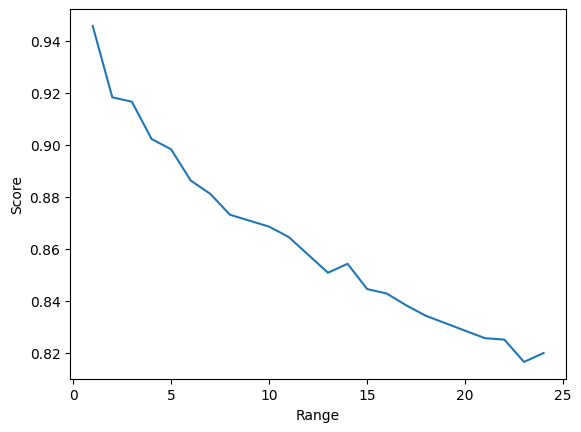

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))

plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

The resulting accuracy for the **KNN** model was: 0.92

### 2) Logistic Regression Classification

In [ ]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.544882790165809


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The resulting accuracy for the **Logistic Regression** model was: 0.55

### 3) Decision Tree Classification

In [ ]:
# %% Decision Tree classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8890794739851343


The resulting accuracy for the **Decision Tree** model was: 0.89

### 4) Random Forest Classification

In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.8890794739851343


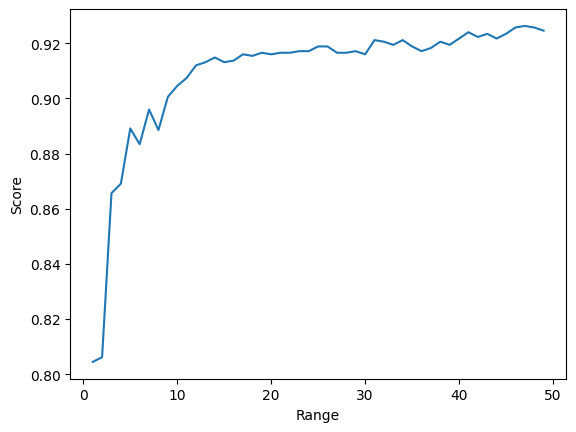

In [ ]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 48, random_state = 1) #set tree number
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 48 trees is :",accuracy_rf)

Random Forest accuracy for 48 trees is : 0.9256718124642653


The resulting accuracy for the **Random Forest** model was: 0.93

### 5) Naive Bayes Classification

In [ ]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.6420811892510006


The resulting accuracy for the **Naive Bayes** model was: 0.64

## EVALUATION

In [ ]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk menampilkan evaluasi model
def print_scores(headline, y_true, y_pred):
    print(headline)

    # Menampilkan Akurasi
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ", acc_score)

    # Menampilkan Precision (gunakan 'weighted' untuk multiclass)
    pre_score = precision_score(y_true, y_pred, average='weighted')
    print("precision: ", pre_score)

    # Menampilkan Recall (gunakan 'weighted' untuk multiclass)
    rec_score = recall_score(y_true, y_pred, average='weighted')
    print("recall: ", rec_score)

    # Menampilkan F1-Score (gunakan 'weighted' untuk multiclass)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ", f_score)

    print('========================')

In [ ]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.544882790165809
precision:  0.5350965642075081
recall:  0.544882790165809
f1_score:  0.5371811936750959
=========Naive Bayes=========;
accuracy:  0.6420811892510006
precision:  0.680659009844462
recall:  0.6420811892510006
f1_score:  0.608273583958254
=========Decision Tree=========;
accuracy:  0.8890794739851343
precision:  0.88849107619578
recall:  0.8890794739851343
f1_score:  0.8883118282645875
=========Random Forest=========;
accuracy:  0.9256718124642653
precision:  0.9256408802764986
recall:  0.9256718124642653
f1_score:  0.9252903671274441
=========KNN=========;
accuracy:  0.9165237278444825
precision:  0.9173253250611456
recall:  0.9165237278444825
f1_score:  0.9151684502500077


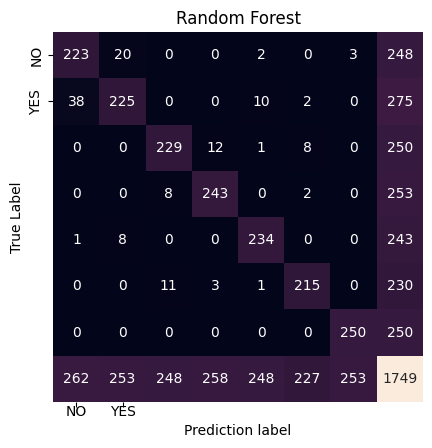

In [ ]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

The evaluation results for the **Random Forest** model showed:
- TN = 223
- TP = 225
- FN = 38
- FP = 20

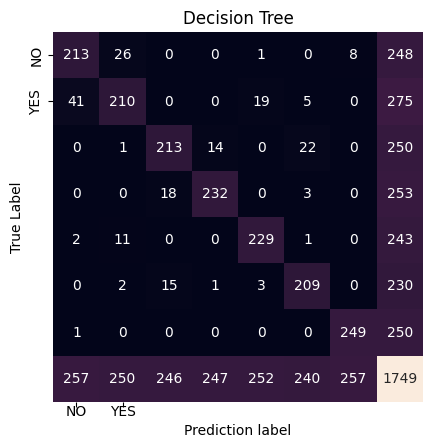

In [ ]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

The evaluation results for the **Decision Tree** model showed:
- TN = 213
- TP = 210
- FN = 41
- FP = 26

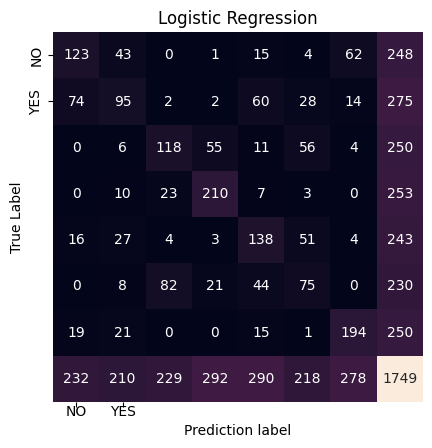

In [ ]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

The evaluation results for the **Logistic Regression** model showed:
- TN = 123
- TP = 95
- FN = 74
- FP = 43

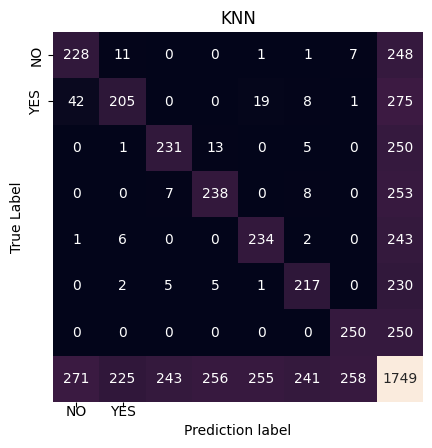

In [ ]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

The evaluation results for the **KKN** model showed:
- TN = 228
- TP = 205
- FN = 42
- FP = 11

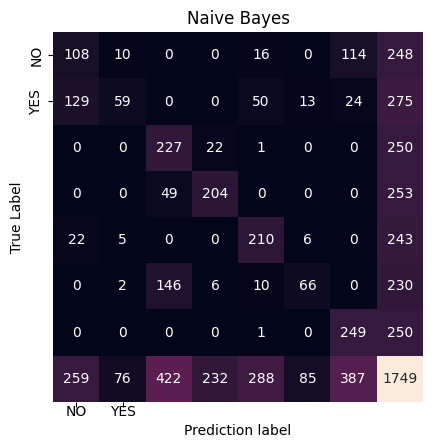

In [ ]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

The evaluation results for the **Naive Bayes** model showed:
- TN = 108
- TP = 59
- FN = 129
- FP = 10

# 6. Results and Summary

**RESULT**

KKN Accuracy = 0.92

KKN Evaluation :
- TN = 228
- TP = 205
- FN = 42
- FP = 11


Logistic Regression Accuracy = 0.55

Logistic Regression Evaluation :
- TN = 123
- TP = 95
- FN = 74
- FP = 43


Decision Tree Accuracy = 0.89

Decision Tree Evaluation :
- TN = 213
- TP = 210
- FN = 41
- FP = 26


Random Forest Accuracy = 0.93

Random Forest Evaluation :
- TN = 223
- TP = 225
- FN = 38
- FP = 20

Naive Bayes Accuracy = 0.64

Naive Bayes Evaluation :
- TN = 108
- TP = 59
- FN = 129
- FP = 10

**SUMMARY**

Based on the results, it shows that the Random Forest model has the highest accuracy of 0.93, supported by model evaluation which demonstrates smaller FN and FP values compared to the others. This is followed by the KNN model with an accuracy of 0.92, and the Decision Tree model with an accuracy of 0.89. On the other hand, the model with the lowest accuracy is the Logistic Regression model, with a score of 0.55 and relatively high FP and FN values.

Therefore, in this case, the **Random Forest, KNN, and Decision Tree** models are the most suitable for predicting land cover types.